In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler 
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_excel(r"C:\Users\mjcanudo\Documents\Nova\ML\Project1\1st Project - Customer Segmentation-20240324\Products.xlsx")
df = df.set_index('Cust_ID')
df.columns = df.columns.str.replace("&", "_")

In [3]:
df["total_spent"] = df["Fitness_Gym"] + df["Hiking_Running"] + df["TeamGames"] + df["OutdoorActivities"] 
df["total_spent_avg"] = df["total_spent"] / df["TotalProducts"]

In [4]:
df["bins"] = pd.cut(df["total_spent_avg"], 10, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).astype(int)

In [5]:
max_datetime = df['Last_Purchase'].max()

df['Last_Purchase'] = pd.to_datetime(df['Last_Purchase'])

df['date_difference'] = (max_datetime - df['Last_Purchase']).dt.days

In [6]:
df["Fitness_Gym_pct"] = df["Fitness_Gym"] / df["total_spent"]
df["Hiking_Running_pct"] = df["Hiking_Running"] / df["total_spent"]
df["TeamGames_pct"] = df["TeamGames"] / df["total_spent"]
df["OutdoorActivities_pct"] = df["OutdoorActivities"] / df["total_spent"]

In [7]:
df["days_since_last_purchase"] = datetime.today() -  df["Last_Purchase"]
df["days_since_last_purchase"] = df["days_since_last_purchase"].dt.days

In [8]:
df

,Fitness_Gym,Hiking_Running,Last_Purchase,TeamGames,OutdoorActivities,TotalProducts,total_spent,total_spent_avg,bins,date_difference,Fitness_Gym_pct,Hiking_Running_pct,TeamGames_pct,OutdoorActivities_pct,days_since_last_purchase
Cust_ID,,,,,,,,,,,,,,,
4,0,76,2024-02-19,248,37,6,361,60.166667,3,10,0.000000,0.210526,0.686981,0.102493,61
5,0,75,2024-02-17,248,37,6,360,60.000000,3,12,0.000000,0.208333,0.688889,0.102778,63
6,6,69,2024-02-15,215,34,5,324,64.800000,3,14,0.018519,0.212963,0.663580,0.104938,65
9,36,71,2024-02-13,248,35,8,390,48.750000,2,16,0.092308,0.182051,0.635897,0.089744,67
10,8,97,2024-02-15,204,34,5,343,68.600000,4,14,0.023324,0.282799,0.594752,0.099125,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489,29,36,2024-02-05,53,32,4,150,37.500000,2,24,0.193333,0.240000,0.353333,0.213333,75
6491,38,32,2024-02-01,136,34,5,240,48.000000,2,28,0.158333,0.133333,0.566667,0.141667,79
6492,29,39,2024-02-06,93,34,5,195,39.000000,2,23,0.148718,0.200000,0.476923,0.174359,74


<Axes: xlabel='Hiking_Running'>

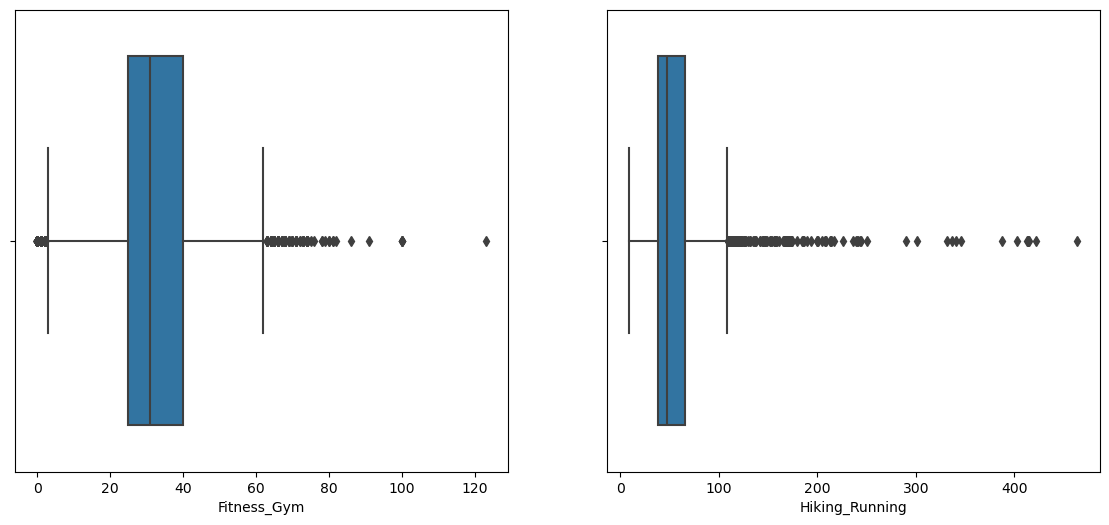

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6))
sns.boxplot(ax = ax1, data = df, x = 'Fitness_Gym')
sns.boxplot(ax = ax2, data = df, x = 'Hiking_Running')
# para ver se há outliers

<Axes: xlabel='OutdoorActivities'>

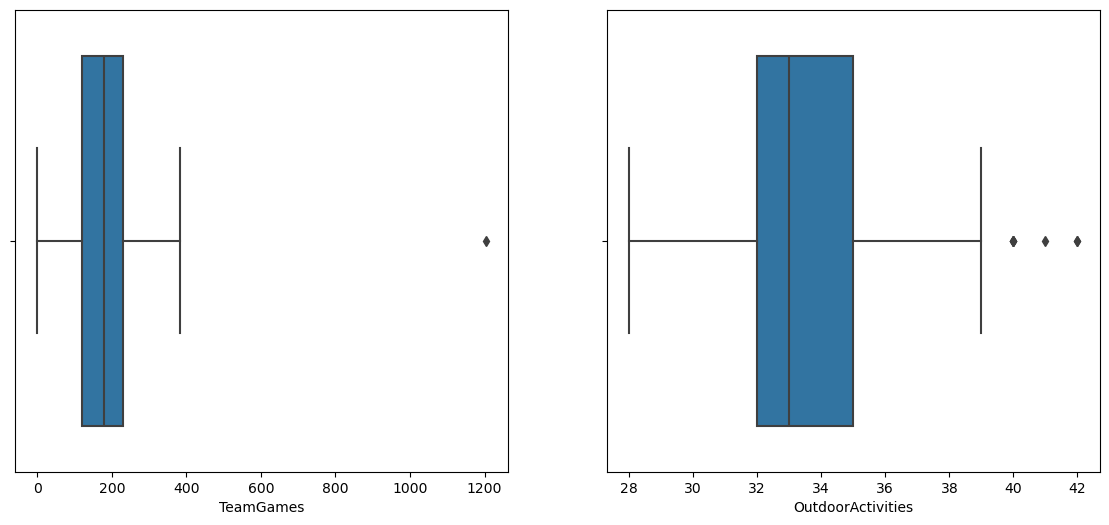

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6))
sns.boxplot(ax = ax1, data = df, x = 'TeamGames')
sns.boxplot(ax = ax2, data = df, x = 'OutdoorActivities')

In [11]:
prod_sem_out = df.copy()
prod_sem_out = prod_sem_out.drop(prod_sem_out[prod_sem_out['TeamGames'] > 500].index)
prod_sem_out = prod_sem_out.drop(prod_sem_out[prod_sem_out['OutdoorActivities'] > 39].index)
prod_sem_out = prod_sem_out.drop(prod_sem_out[prod_sem_out['TotalProducts'] > 10 ].index)
prod_sem_out = prod_sem_out.drop(prod_sem_out[prod_sem_out['Hiking_Running'] > 250 ].index)
prod_sem_out_default = prod_sem_out.copy()

In [12]:
prod_sem_out["Fitness_Gym"] = np.sqrt(prod_sem_out["Fitness_Gym"])
prod_sem_out["Hiking_Running"] = np.sqrt(prod_sem_out["Hiking_Running"])
prod_sem_out["TeamGames"] = np.sqrt(prod_sem_out["TeamGames"])
prod_sem_out["OutdoorActivities"] = np.sqrt(prod_sem_out["OutdoorActivities"])
prod_sem_out["total_spent"] = np.sqrt(prod_sem_out["total_spent"])
prod_sem_out["total_spent_avg"] = np.sqrt(prod_sem_out["total_spent_avg"])
prod_sem_out["bins"] = np.sqrt(prod_sem_out["bins"])
prod_sem_out["TotalProducts"] = np.sqrt(prod_sem_out["TotalProducts"])

prod_sem_out["Fitness_Gym_pct"] = np.sqrt(prod_sem_out["Fitness_Gym_pct"])
prod_sem_out["Hiking_Running_pct"] = np.sqrt(prod_sem_out["Hiking_Running_pct"])
prod_sem_out["TeamGames_pct"] = np.sqrt(prod_sem_out["TeamGames_pct"])
prod_sem_out["OutdoorActivities_pct"] = np.sqrt(prod_sem_out["OutdoorActivities_pct"])
prod_sem_out["days_since_last_purchase"] = np.sqrt(prod_sem_out["days_since_last_purchase"])
prod_sem_out['date_difference'] = np.sqrt(prod_sem_out["date_difference"])

In [13]:
df_sqrt = df.copy()

In [14]:
df_sqrt["Fitness_Gym"] = np.sqrt(df_sqrt["Fitness_Gym"])
df_sqrt["Hiking_Running"] = np.sqrt(df_sqrt["Hiking_Running"])
df_sqrt["TeamGames"] = np.sqrt(df_sqrt["TeamGames"])
df_sqrt["OutdoorActivities"] = np.sqrt(df_sqrt["OutdoorActivities"])
df_sqrt["total_spent"] = np.sqrt(df_sqrt["total_spent"])
df_sqrt["total_spent_avg"] = np.sqrt(df_sqrt["total_spent_avg"])
df_sqrt["bins"] = np.sqrt(df_sqrt["bins"])
df_sqrt["TotalProducts"] = np.sqrt(df_sqrt["TotalProducts"])

df_sqrt["Fitness_Gym_pct"] = np.sqrt(df_sqrt["Fitness_Gym_pct"])
df_sqrt["Hiking_Running_pct"] = np.sqrt(df_sqrt["Hiking_Running_pct"])
df_sqrt["TeamGames_pct"] = np.sqrt(df_sqrt["TeamGames_pct"])
df_sqrt["OutdoorActivities_pct"] = np.sqrt(df_sqrt["OutdoorActivities_pct"])
df_sqrt["days_since_last_purchase"] = np.sqrt(df_sqrt["days_since_last_purchase"])
df_sqrt['date_difference'] = np.sqrt(df_sqrt["date_difference"])


In [15]:
df.columns

Index(['Fitness_Gym', 'Hiking_Running', 'Last_Purchase', 'TeamGames',
       'OutdoorActivities', 'TotalProducts', 'total_spent', 'total_spent_avg',
       'bins', 'date_difference', 'Fitness_Gym_pct', 'Hiking_Running_pct',
       'TeamGames_pct', 'OutdoorActivities_pct', 'days_since_last_purchase'],
      dtype='object')

In [16]:
df_sqrt.columns

Index(['Fitness_Gym', 'Hiking_Running', 'Last_Purchase', 'TeamGames',
       'OutdoorActivities', 'TotalProducts', 'total_spent', 'total_spent_avg',
       'bins', 'date_difference', 'Fitness_Gym_pct', 'Hiking_Running_pct',
       'TeamGames_pct', 'OutdoorActivities_pct', 'days_since_last_purchase'],
      dtype='object')

In [17]:
prod_sem_out.columns

Index(['Fitness_Gym', 'Hiking_Running', 'Last_Purchase', 'TeamGames',
       'OutdoorActivities', 'TotalProducts', 'total_spent', 'total_spent_avg',
       'bins', 'date_difference', 'Fitness_Gym_pct', 'Hiking_Running_pct',
       'TeamGames_pct', 'OutdoorActivities_pct', 'days_since_last_purchase'],
      dtype='object')

At this point we have 3 Dataframes:
- df with the original values and added variabes
- df_sqrt with the square root of df
- prod_sem_out with the square root of df and no outliers

This way we can easily feed different dataframes and different combinations of variables into the algorithm for testing

In [70]:
#df_test = df_sqrt[["date_difference", "Fitness_Gym", "Hiking_Running", "TeamGames", "OutdoorActivities", "TotalProducts"]]
#df_test = df[["Fitness_Gym_pct", "Hiking_Running_pct", "TeamGames_pct", "OutdoorActivities_pct", "total_spent_avg"]]
df_test = prod_sem_out[["date_difference", "Fitness_Gym", "Hiking_Running", "TeamGames", "OutdoorActivities", "TotalProducts"]]

In [71]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_test)

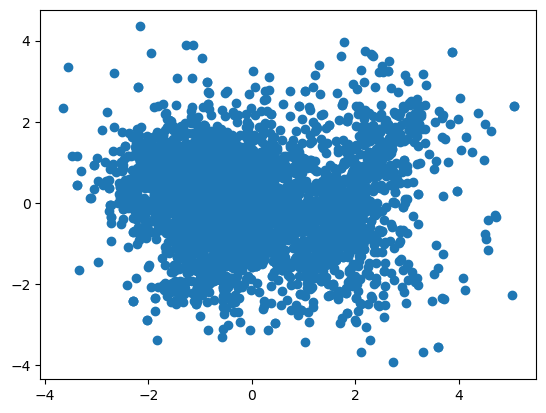

In [21]:
pca_model = PCA(n_components=2)
pc = pca_model.fit_transform(df_scaled)

plt.scatter(pc[:,0], pc[:,1])

Elbow Method

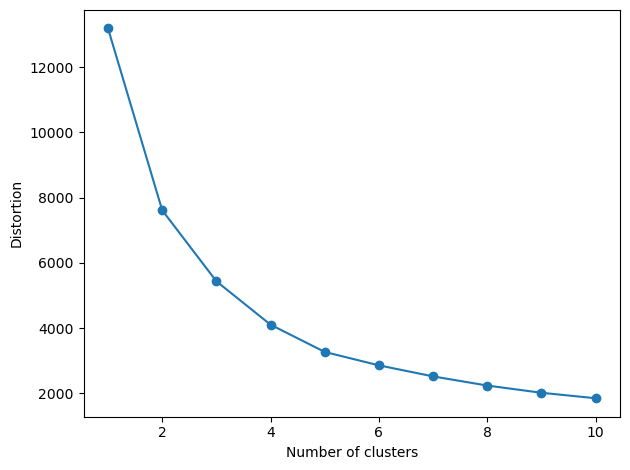

In [22]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
        init='k-means++',
        n_init=10,
        max_iter=300,
        random_state=0)
    km.fit(pc)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

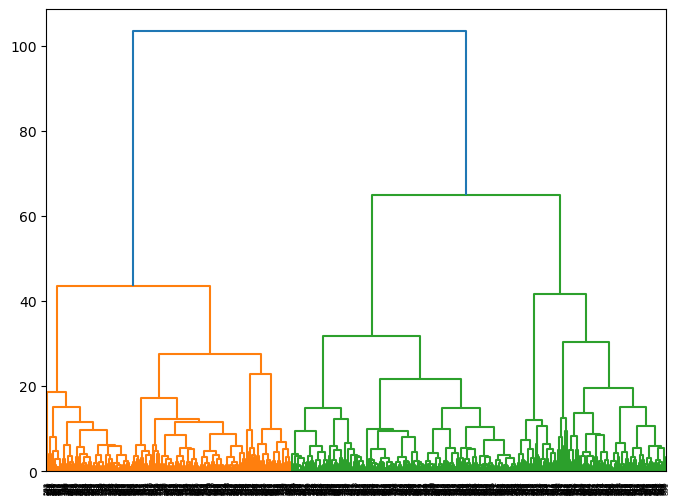

In [76]:
df_test_sample = df_test.sample(n = 1000, random_state = 100) #select only a sample, due to computational weight, creating a new data frame
clusters = hierarchy.linkage(df_test_sample, method="ward") #
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

# no dendograma para ver os cluster queremos ter linhas com grande distancia entre elas, no de baixo poderiamos considerar 2, 3 ou 4?
# passar a linha

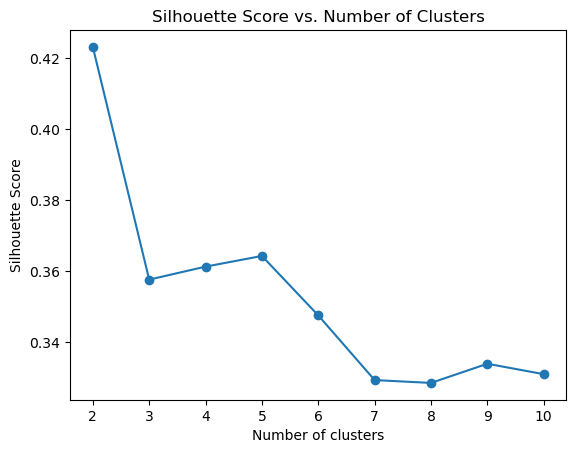

In [24]:
ks = range(2, 11)

# Calculate silhouette scores for each value of k
silhouette_scores = []
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=100, n_init=10)
    kmeans.fit(pc)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(pc, labels)
    silhouette_scores.append(silhouette_avg)
# Plot the silhouette scores
plt.plot(ks, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xticks(ks)
plt.show()

KMeans

In [25]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300)

clustered_k = km.fit_predict(pc)

df_clustered = pd.DataFrame(pc, index=prod_sem_out.index)
df_clustered["cluster"] = km.labels_

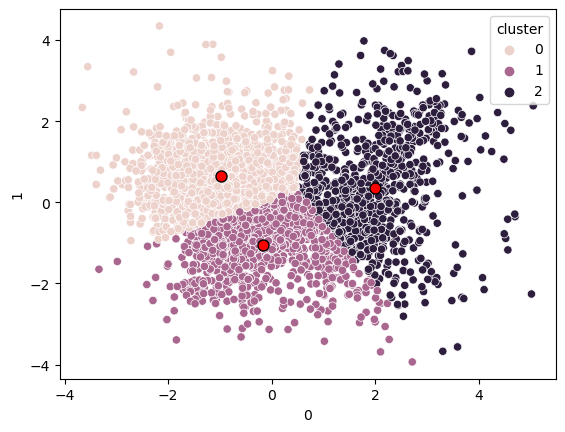

In [26]:
sns.scatterplot(df_clustered, x=df_clustered[0], y=df_clustered[1], hue='cluster')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='.',
            c='red', edgecolor='black',
            label='Centroids')

DBSCAN

<Axes: xlabel='0', ylabel='1'>

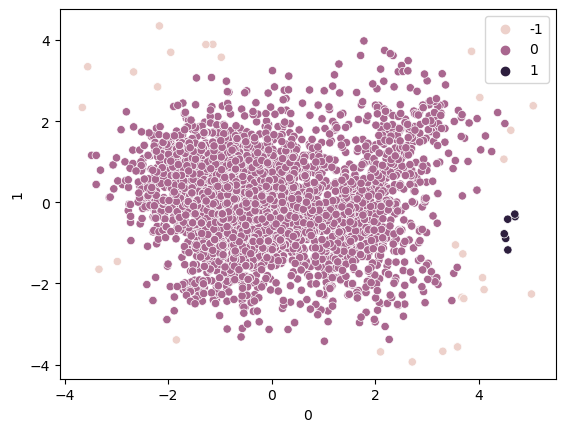

In [58]:
df_DBSCAN = DBSCAN().fit(pc)

df_clustered_DB = prod_sem_out.copy()
df_clustered_DB["cluster"] = df_DBSCAN.labels_

pc_c = pd.DataFrame(pc, index=df_DBSCAN.labels_)
sns.scatterplot(pc_c, x=pc_c[0], y=pc_c[1], hue=pc_c.index)

<Axes: xlabel='0', ylabel='1'>

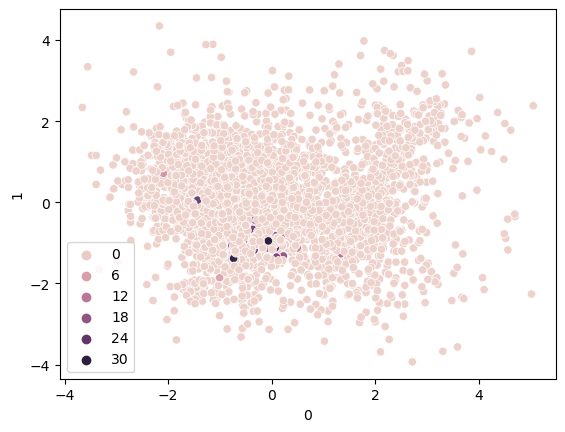

In [69]:
# DBSCAN - tunning the parameters show no significant improvement
df_DBSCAN = DBSCAN(eps=0.015, min_samples=4).fit(pc)

df_clustered_DB = prod_sem_out.copy()
df_clustered_DB["cluster"] = df_DBSCAN.labels_

pc_c = pd.DataFrame(pc, index=df_DBSCAN.labels_)
sns.scatterplot(pc_c, x=pc_c[0], y=pc_c[1], hue=pc_c.index)

In [29]:
df_final = prod_sem_out_default.merge(df_clustered["cluster"], how='left', left_index=True, right_index=True).copy()

In [30]:
df_final.query(' cluster == 0 ').describe()

,Fitness_Gym,Hiking_Running,Last_Purchase,TeamGames,OutdoorActivities,TotalProducts,total_spent,total_spent_avg,bins,date_difference,Fitness_Gym_pct,Hiking_Running_pct,TeamGames_pct,OutdoorActivities_pct,days_since_last_purchase,cluster
count,1341.000000,1341.000000,1341,1341.00000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.0
mean,40.003729,57.414616,2024-01-22 08:19:19.731543552,220.51827,32.673378,5.299031,350.609993,69.614735,3.618195,37.653244,0.115570,0.163783,0.624864,0.095783,88.653244,1.0
min,13.000000,28.000000,2023-10-29 00:00:00,67.00000,28.000000,3.000000,202.000000,20.200000,1.000000,2.000000,0.035135,0.067686,0.264822,0.051813,53.000000,1.0
25%,30.000000,44.000000,2024-01-10 00:00:00,188.00000,32.000000,4.000000,310.000000,57.000000,3.000000,25.000000,0.085246,0.128571,0.591195,0.083544,76.000000,1.0
50%,38.000000,50.000000,2024-01-22 00:00:00,225.00000,33.000000,5.000000,351.000000,68.666667,4.000000,38.000000,0.110540,0.149007,0.637931,0.094118,89.000000,1.0
75%,49.000000,59.000000,2024-02-04 00:00:00,258.00000,33.000000,6.000000,388.000000,80.500000,4.000000,50.000000,0.138514,0.179431,0.677515,0.106109,101.000000,1.0
max,123.000000,244.000000,2024-02-27 00:00:00,372.00000,38.000000,10.000000,590.000000,132.333333,7.000000,123.000000,0.471264,0.496894,0.801310,0.154589,174.000000,1.0
std,13.879088,26.135232,NaN,50.70165,1.276346,1.239008,57.794832,18.776224,1.053961,17.658953,0.039532,0.061899,0.078140,0.016421,17.658953,0.0


In [31]:
df_final.query(' cluster == 1 ').describe()

,Fitness_Gym,Hiking_Running,Last_Purchase,TeamGames,OutdoorActivities,TotalProducts,total_spent,total_spent_avg,bins,date_difference,Fitness_Gym_pct,Hiking_Running_pct,TeamGames_pct,OutdoorActivities_pct,days_since_last_purchase,cluster
count,932.000000,932.000000,932,932.000000,932.00000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.0
mean,22.865880,80.300429,2024-02-13 12:35:32.188841216,215.817597,35.06867,6.350858,354.052575,57.405999,2.968884,15.475322,0.062922,0.224924,0.609444,0.102710,66.475322,2.0
min,0.000000,34.000000,2023-12-16 00:00:00,63.000000,31.00000,4.000000,136.000000,15.111111,1.000000,0.000000,0.000000,0.110482,0.332447,0.049401,51.000000,2.0
25%,8.000000,66.000000,2024-02-07 00:00:00,190.750000,34.00000,6.000000,316.750000,48.285714,2.000000,7.000000,0.023940,0.195301,0.583632,0.088889,58.000000,2.0
50%,24.000000,78.000000,2024-02-16 00:00:00,215.000000,35.00000,6.000000,352.500000,57.000000,3.000000,13.000000,0.063864,0.218750,0.614776,0.100000,64.000000,2.0
75%,34.250000,88.000000,2024-02-22 00:00:00,241.000000,36.00000,7.000000,389.000000,65.800000,3.000000,22.000000,0.097434,0.245426,0.643584,0.111195,73.000000,2.0
max,74.000000,250.000000,2024-02-29 00:00:00,384.000000,39.00000,10.000000,668.000000,103.500000,5.000000,75.000000,0.225256,0.502717,0.771930,0.272059,126.000000,2.0
std,16.304706,27.767445,NaN,41.955234,1.44115,1.234254,63.902672,13.134594,0.761660,10.965841,0.042829,0.050916,0.051370,0.022040,10.965841,0.0


In [32]:
df_final.query(' cluster == 2 ').describe()

,Fitness_Gym,Hiking_Running,Last_Purchase,TeamGames,OutdoorActivities,TotalProducts,total_spent,total_spent_avg,bins,date_difference,Fitness_Gym_pct,Hiking_Running_pct,TeamGames_pct,OutdoorActivities_pct,days_since_last_purchase,cluster
count,1688.000000,1688.000000,1688,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.0
mean,30.655213,38.053318,2024-01-29 15:03:24.739336192,117.116114,33.525474,4.661730,219.350118,49.894315,2.552725,30.372630,0.146268,0.177526,0.515518,0.160689,81.372630,0.0
min,0.000000,9.000000,2023-10-15 00:00:00,0.000000,29.000000,2.000000,62.000000,12.000000,1.000000,1.000000,0.000000,0.070652,0.000000,0.094972,52.000000,0.0
25%,26.000000,32.000000,2024-01-21 00:00:00,86.000000,32.000000,4.000000,186.000000,38.000000,2.000000,20.000000,0.110135,0.147880,0.454022,0.132530,71.000000,0.0
50%,30.000000,38.000000,2024-01-31 00:00:00,113.000000,34.000000,4.000000,218.000000,47.633333,2.000000,29.000000,0.145120,0.176471,0.522049,0.153328,80.000000,0.0
75%,35.000000,44.000000,2024-02-09 00:00:00,147.000000,34.000000,5.000000,252.250000,59.850000,3.000000,39.000000,0.180296,0.201664,0.588235,0.178306,90.000000,0.0
max,74.000000,76.000000,2024-02-28 00:00:00,266.000000,39.000000,10.000000,364.000000,119.333333,6.000000,137.000000,0.378049,0.387755,0.751572,0.548387,188.000000,0.0
std,9.356388,9.025066,NaN,44.071783,1.532672,1.129926,47.136964,16.521132,0.934521,14.435693,0.053153,0.042044,0.102217,0.040257,14.435693,0.0


In [33]:
df_trunc = df_final[["Fitness_Gym", "Hiking_Running", "TeamGames", "OutdoorActivities", "TotalProducts", "date_difference", "cluster"]].copy()

In [34]:
cluster_distribution = df_trunc["cluster"].value_counts()
print("Cluster Distribution:")
print(cluster_distribution)

cluster_characteristics = df_trunc.groupby("cluster").agg(['mean', 'median', 'std'])
print("\nCluster Characteristics:")
print(cluster_characteristics)

Cluster Distribution:
cluster
0    1688
1    1341
2     932
Name: count, dtype: int64

Cluster Characteristics:
        Fitness_Gym                   Hiking_Running                    \
               mean median        std           mean median        std   
cluster                                                                  
0         30.655213   30.0   9.356388      38.053318   38.0   9.025066   
1         40.003729   38.0  13.879088      57.414616   50.0  26.135232   
2         22.865880   24.0  16.304706      80.300429   78.0  27.767445   

          TeamGames                   OutdoorActivities                   \
               mean median        std              mean median       std   
cluster                                                                    
0        117.116114  113.0  44.071783         33.525474   34.0  1.532672   
1        220.518270  225.0  50.701650         32.673378   33.0  1.276346   
2        215.817597  215.0  41.955234         35.068670   35.0 

In [35]:
df_trunc0 = df_trunc.query(' cluster == 0 ')
df_trunc1 = df_trunc.query(' cluster == 1 ')
df_trunc2 = df_trunc.query(' cluster == 2 ')

Product Categories by Mean

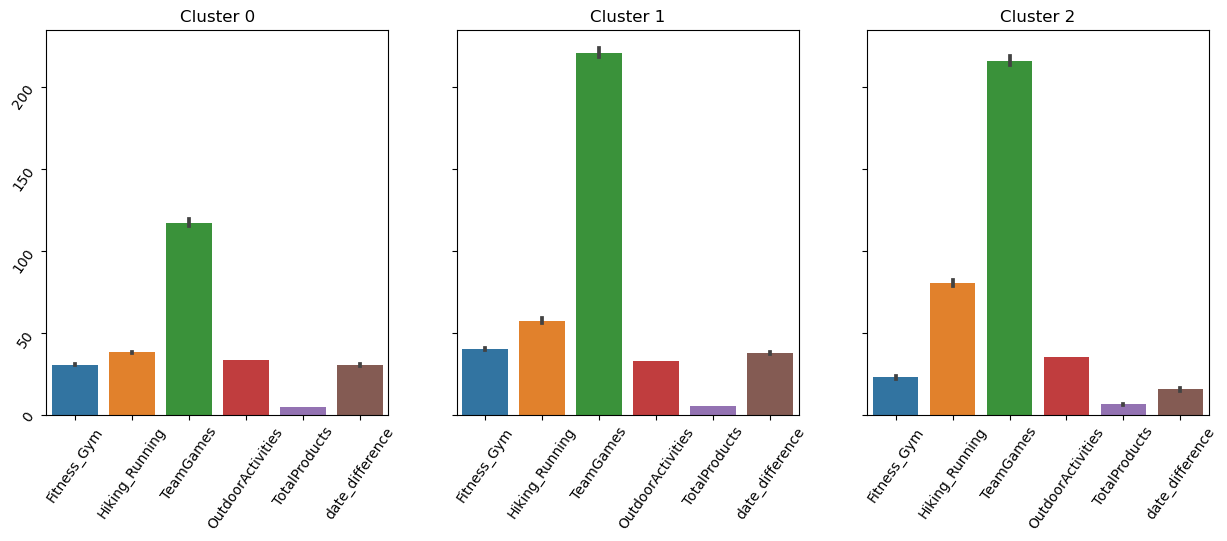

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15, 5))
sns.barplot(df_trunc0.melt(id_vars='cluster'), x='variable', y='value', ax=ax1).set(xlabel=None, ylabel=None)
ax1.tick_params(labelrotation=55)
ax1.title.set_text('Cluster 0')

sns.barplot(df_trunc1.melt(id_vars='cluster'), x='variable', y='value', ax=ax2).set( xlabel=None, ylabel=None)
ax2.tick_params(labelrotation=55)
ax2.title.set_text('Cluster 1')

sns.barplot(df_trunc2.melt(id_vars='cluster'), x='variable', y='value', ax=ax3).set( xlabel=None, ylabel=None)
ax3.tick_params(labelrotation=55)
ax3.title.set_text('Cluster 2')

Product Categories by Sum

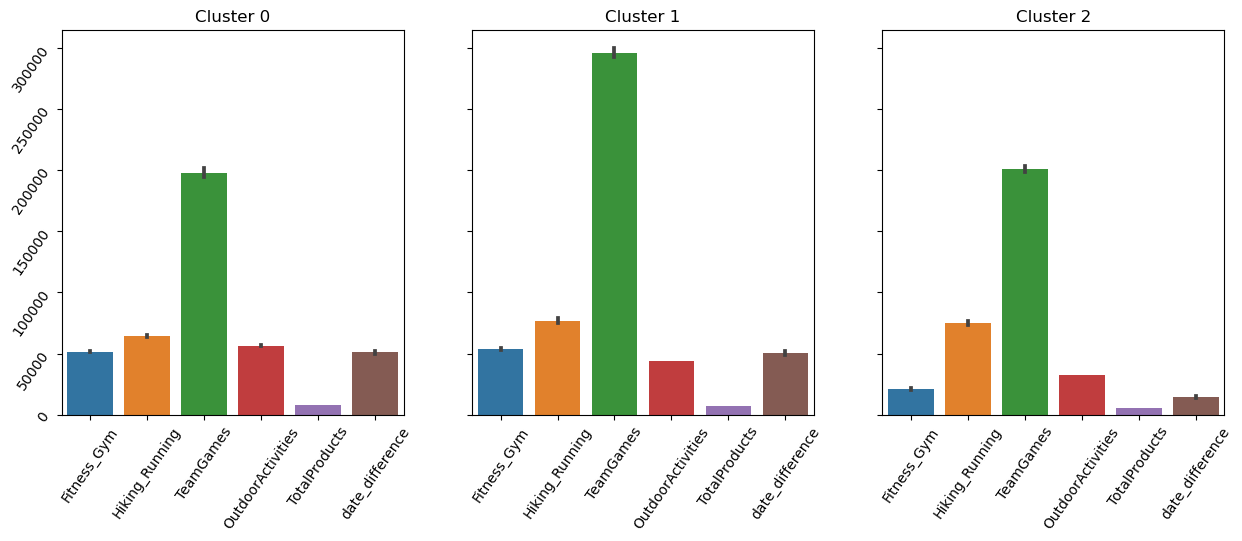

In [53]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15, 5))
sns.barplot(df_trunc0.melt(id_vars='cluster'), x='variable', y='value', ax=ax1, estimator="sum").set(xlabel=None, ylabel=None)
ax1.tick_params(labelrotation=55)
ax1.title.set_text('Cluster 0')

sns.barplot(df_trunc1.melt(id_vars='cluster'), x='variable', y='value', ax=ax2, estimator="sum").set( xlabel=None, ylabel=None)
ax2.tick_params(labelrotation=55)
ax2.title.set_text('Cluster 1')

sns.barplot(df_trunc2.melt(id_vars='cluster'), x='variable', y='value', ax=ax3, estimator="sum").set( xlabel=None, ylabel=None)
ax3.tick_params(labelrotation=55)
ax3.title.set_text('Cluster 2')

In [37]:
df_dem = pd.read_excel(r"C:\Users\mjcanudo\Documents\Nova\ML\Project1\1st Project - Customer Segmentation-20240324\Demographic_trabalhado.xlsx")
df_dem = df_dem.set_index('Cust_ID')


In [38]:
df_merged = df_final.merge(df_dem, how='left', left_index=True, right_index=True )

In [39]:
df_merged

,Fitness_Gym,Hiking_Running,Last_Purchase,TeamGames,OutdoorActivities,TotalProducts,total_spent,total_spent_avg,bins,date_difference,Fitness_Gym_pct,Hiking_Running_pct,TeamGames_pct,OutdoorActivities_pct,days_since_last_purchase,cluster,education_level,dependents,Gender,Age
Cust_ID,,,,,,,,,,,,,,,,,,,,
4,0,76,2024-02-19,248,37,6,361,60.166667,3,10,0.000000,0.210526,0.686981,0.102493,61,2,Master,1,Male,22
5,0,75,2024-02-17,248,37,6,360,60.000000,3,12,0.000000,0.208333,0.688889,0.102778,63,2,High School,0,Female,30
6,6,69,2024-02-15,215,34,5,324,64.800000,3,14,0.018519,0.212963,0.663580,0.104938,65,2,PhD,1,Female,19
9,36,71,2024-02-13,248,35,8,390,48.750000,2,16,0.092308,0.182051,0.635897,0.089744,67,2,High School,0,Male,21
10,8,97,2024-02-15,204,34,5,343,68.600000,4,14,0.023324,0.282799,0.594752,0.099125,65,2,less than high school,0,Male,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489,29,36,2024-02-05,53,32,4,150,37.500000,2,24,0.193333,0.240000,0.353333,0.213333,75,0,Bachelor,0,Female,29
6491,38,32,2024-02-01,136,34,5,240,48.000000,2,28,0.158333,0.133333,0.566667,0.141667,79,0,Master,0,Male,28
6492,29,39,2024-02-06,93,34,5,195,39.000000,2,23,0.148718,0.200000,0.476923,0.174359,74,0,High School,0,Male,20


In [40]:
cluster0_demo = df_merged[df_merged["cluster"] == 0]
cluster1_demo = df_merged[df_merged["cluster"] == 1]
cluster2_demo = df_merged[df_merged["cluster"] == 2]

In [41]:
print('***Descriptive Summary of Categorical variables***')
print(cluster0_demo.describe(include = ['O']))

print(' ')
print('***Frequency for each level of education***')
print(round(cluster0_demo['education_level'].value_counts()/len(cluster0_demo)*100,2))

print(' ')
print('***Mean of Dependents***')
print(cluster0_demo['dependents'].mean())

print(' ')
print('***Mean of Age***')
print(cluster0_demo['Age'].mean())

***Descriptive Summary of Categorical variables***
       education_level  Gender
count             1688    1688
unique               5       2
top        High School  Female
freq               548     987
 
***Frequency for each level of education***
education_level
High School              32.46
Bachelor                 26.42
less than high school    20.08
Master                   17.71
PhD                       3.32
Name: count, dtype: float64
 
***Mean of Dependents***
0.283175355450237
 
***Mean of Age***
34.334715639810426


In [42]:
print('***Descriptive Summary of Categorical variables***')
print(cluster1_demo.describe(include = ['O']))

print(' ')
print('***Frequency for each level of education***')
print(round(cluster1_demo['education_level'].value_counts()/len(cluster1_demo)*100,2))

print(' ')
print('***Mean of Dependents***')
print(cluster1_demo['dependents'].mean())

print(' ')
print('***Mean of Age***')
print(cluster1_demo['Age'].mean())

***Descriptive Summary of Categorical variables***
       education_level  Gender
count             1341    1341
unique               5       2
top           Bachelor  Female
freq               413     801
 
***Frequency for each level of education***
education_level
Bachelor                 30.80
High School              28.11
less than high school    24.46
Master                   14.54
PhD                       2.09
Name: count, dtype: float64
 
***Mean of Dependents***
0.3042505592841163
 
***Mean of Age***
34.69425801640567


In [43]:
print('***Descriptive Summary of Categorical variables***')
print(cluster2_demo.describe(include = ['O']))

print(' ')
print('***Frequency for each level of education***')
print(round(cluster2_demo['education_level'].value_counts()/len(cluster2_demo)*100,2))

print(' ')
print('***Mean of Dependents***')
print(cluster2_demo['dependents'].mean())

print(' ')
print('***Mean of Age***')
print(cluster2_demo['Age'].mean())

***Descriptive Summary of Categorical variables***
       education_level  Gender
count              932     932
unique               5       2
top        High School  Female
freq               388     561
 
***Frequency for each level of education***
education_level
High School              41.63
Master                   17.38
Bachelor                 16.52
less than high school    15.34
PhD                       9.12
Name: count, dtype: float64
 
***Mean of Dependents***
0.23390557939914164
 
***Mean of Age***
35.122317596566525


In [44]:
df_merged.columns

Index(['Fitness_Gym', 'Hiking_Running', 'Last_Purchase', 'TeamGames',
       'OutdoorActivities', 'TotalProducts', 'total_spent', 'total_spent_avg',
       'bins', 'date_difference', 'Fitness_Gym_pct', 'Hiking_Running_pct',
       'TeamGames_pct', 'OutdoorActivities_pct', 'days_since_last_purchase',
       'cluster', 'education_level', 'dependents', 'Gender', 'Age'],
      dtype='object')

c:\Users\mjcanudo\AppData\Local\miniconda3\envs\conda_nova\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mjcanudo\AppData\Local\miniconda3\envs\conda_nova\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mjcanudo\AppData\Local\miniconda3\envs\conda_nova\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


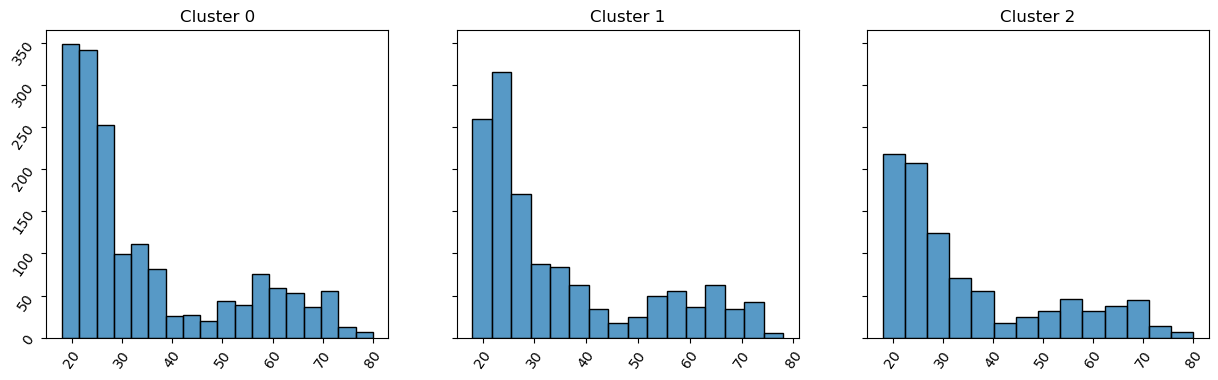

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15, 4))
sns.histplot(df_merged.query('cluster == 0'), x='Age', ax=ax1).set(xlabel=None, ylabel=None)
ax1.tick_params(labelrotation=55)
ax1.title.set_text('Cluster 0')

sns.histplot(df_merged.query('cluster == 1') ,x='Age', ax=ax2).set( xlabel=None, ylabel=None)
ax2.tick_params(labelrotation=55)
ax2.title.set_text('Cluster 1')

sns.histplot(df_merged.query('cluster == 2'), x='Age', ax=ax3).set( xlabel=None, ylabel=None)
ax3.tick_params(labelrotation=55)
ax3.title.set_text('Cluster 2')

c:\Users\mjcanudo\AppData\Local\miniconda3\envs\conda_nova\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mjcanudo\AppData\Local\miniconda3\envs\conda_nova\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mjcanudo\AppData\Local\miniconda3\envs\conda_nova\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


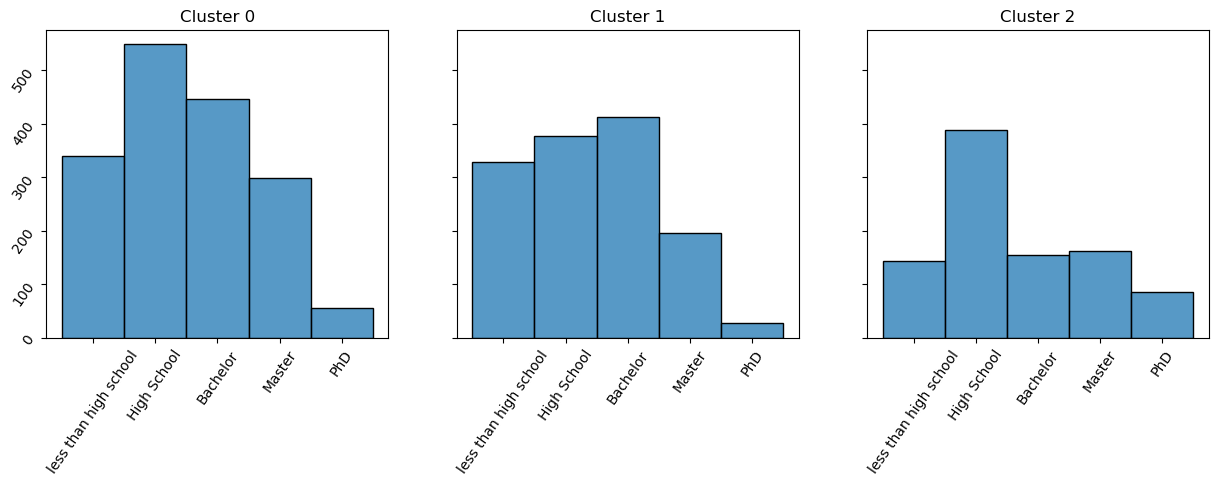

In [47]:
edu_level_dict = {"less than high school":0, "High School":1, "Bachelor":2, "Bachelor":3, "Master":4, "PhD":5}
df_merged["education_level_aux"] = df_merged["education_level"].map(edu_level_dict)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15, 4))
sns.histplot(df_merged.query('cluster == 0').sort_values('education_level_aux'), x='education_level', ax=ax1).set(xlabel=None, ylabel=None)
ax1.tick_params(labelrotation=55)
ax1.title.set_text('Cluster 0')

sns.histplot(df_merged.query('cluster == 1').sort_values('education_level_aux'),x='education_level', ax=ax2).set( xlabel=None, ylabel=None)
ax2.tick_params(labelrotation=55)
ax2.title.set_text('Cluster 1')

sns.histplot(df_merged.query('cluster == 2').sort_values('education_level_aux'), x='education_level', ax=ax3).set( xlabel=None, ylabel=None)
ax3.tick_params(labelrotation=55)
ax3.title.set_text('Cluster 2')

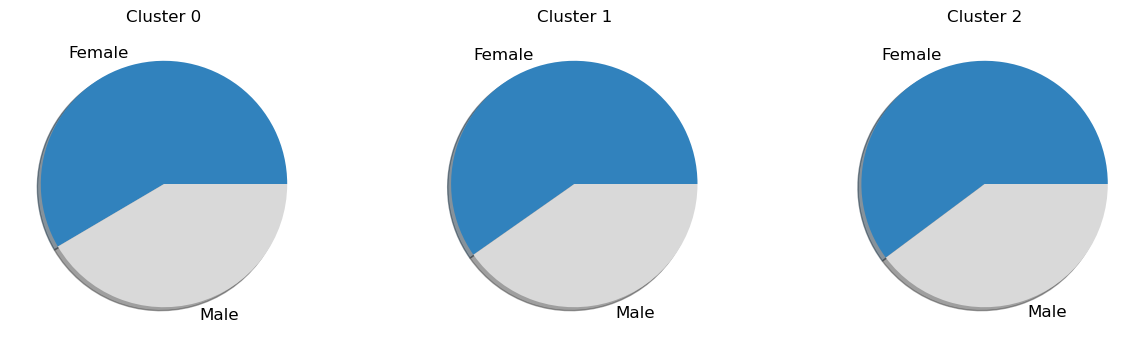

In [99]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
df_merged.query(' cluster == 0 ').groupby('Gender').size().plot(kind='pie', textprops={'fontsize': 12}, ax=ax1, shadow=True, colormap="tab20c")
ax1.title.set_text('Cluster 0')

df_merged.query(' cluster == 1 ').groupby('Gender').size().plot(kind='pie', textprops={'fontsize': 12}, ax=ax2, shadow=True, colormap="tab20c")
ax2.title.set_text('Cluster 1')

df_merged.query(' cluster == 2 ').groupby('Gender').size().plot(kind='pie', textprops={'fontsize': 12}, ax=ax3, shadow=True, colormap="tab20c")
ax3.title.set_text('Cluster 2')


<Axes: ylabel='cluster'>

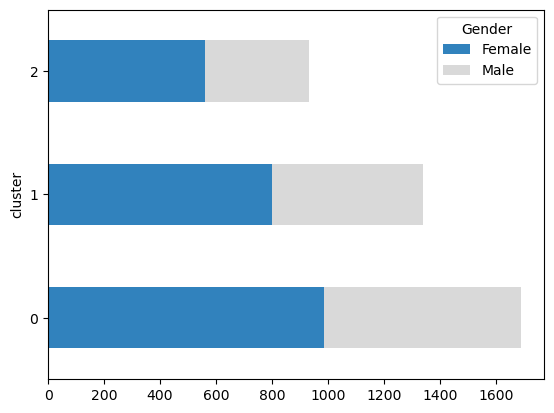

In [93]:
df_merged.groupby(['cluster', 'Gender']).size().unstack().plot(kind='barh', stacked=True, colormap="tab20c")

<Axes: ylabel='cluster'>

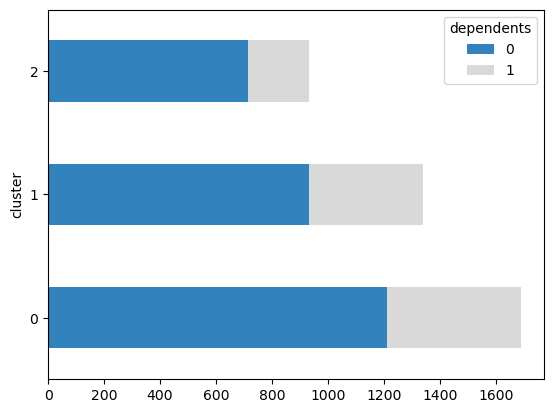

In [94]:
df_merged.groupby(['cluster', 'dependents']).size().unstack().plot(kind='barh', stacked=True, colormap="tab20c")